In [1]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pandas import read_csv
from sklearn.preprocessing import RobustScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

from utils.data_preprocessing import rename_labels

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Load Datasets

In [2]:
def load_dataset(path):
    df_all = None

    for file in list(glob.glob(path)):
        print('Loading ', file, '...')
        reader = pd.read_csv(file, chunksize=10**6, skipinitialspace=True)  # Read in data from csv file

        for df in reader:
            df = df.sample(frac=0.1)

            # Remove unused columns if present
            if 'Timestamp' in df:
                df = df.drop('Timestamp', axis=1)
            if 'Flow ID' in df:
                df = df.drop('Flow ID', axis=1)
            if 'Src IP' in df:
                df = df.drop('Src IP', axis=1)
            if 'Src Port' in df:
                df = df.drop('Src Port', axis=1)
            if 'Dst IP' in df:
                df = df.drop('Dst IP', axis=1)

            # Concatenate datasets
            if df_all is None:
                df_all = df
            else:
                df_all = pd.concat([df_all, df], axis=0)
            
    return df_all

In [3]:
# Load CIC 2018 datasets
cic_df = load_dataset('/home/chanel/Cyber/yang-summer-2022/data/CIC-IDS2018/DoS/*.csv')

# Remove extra rows containing column names
cic_df = cic_df.loc[cic_df['Flow Duration'] != 'Flow Duration'] 

cic_df.head()

Loading  /home/chanel/Cyber/yang-summer-2022/data/CIC-IDS2018/DoS/02-15-2018.csv ...
Loading  /home/chanel/Cyber/yang-summer-2022/data/CIC-IDS2018/DoS/02-16-2018.csv ...


/tmp/ipykernel_1905358/3692968983.py:8: DtypeWarning: Columns (0,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78) have mixed types. Specify dtype option on import or set low_memory=False.
  for df in reader:


,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Fwd Byts/b Avg,Fwd Pkts/b Avg,Fwd Blk Rate Avg,Bwd Byts/b Avg,Bwd Pkts/b Avg,Bwd Blk Rate Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
646568,53,17,1971,1,1,45,134,45,45,45.0,0.0,134,134,134.0,0.0,90816.844242,1014.713343,1971.0,0.0,1971,1971,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,8,8,507.356672,507.356672,45,134,74.666667,51.384174,2640.333333,0,0,0,0,0,0,0,0,1,112.0,45.0,134.0,0,0,0,0,0,0,1,45,1,134,-1,-1,0,8,0.0,0.0,0,0,0.0,0.0,0,0,Benign
697681,443,6,115218612,21,17,1860,3988,1253,0,88.571429,279.772331,1400,0,234.588235,511.61412,50.755689,0.329808,3114016.540541,4639994.533096,10176300,11,115218612,5760930.6,5011012.1527,10217048,34,111608300,6975518.75,4837036.90886,10212723,25,0,0,0,0,432,484,0.182262,0.147546,0,1400,149.948718,396.591262,157284.62888,0,0,0,1,0,0,0,0,0,153.894737,88.571429,234.588235,0,0,0,0,0,0,21,1860,17,3988,8192,13783,15,20,49258.363636,54430.541863,210107,11442,10094304.181818,61470.498944,10176300,9952884,Benign
118721,80,6,891,3,4,161,488,161,0,53.666667,92.953393,488,0,122.0,244.0,728395.061728,7856.34119,148.5,110.921143,311,0,500,250.0,168.291414,369,131,580,193.333333,188.226814,376,0,0,0,0,0,72,92,3367.003367,4489.337823,0,488,81.125,173.787586,30202.125,0,0,0,1,0,0,0,0,1,92.714286,53.666667,122.0,0,0,0,0,0,0,3,161,4,488,8192,149,1,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign
698685,443,6,74904900,10,8,39,0,31,0,3.9,9.527154,0,0,0.0,0.0,0.52066,0.240305,4406170.588235,4954433.210854,10008715,33,74904900,8322766.666667,3589501.765198,10048064,33,70233046,10033292.285714,6450.739201,10047879,10029808,0,0,0,0,200,256,0.133503,0.106802,0,31,2.105263,7.015021,49.210526,0,0,0,0,1,0,0,0,0,2.222222,3.9,0.0,0,0,0,0,0,0,10,39,8,0,254,5099,8,20,24954.0,6864.715168,40520,22264,10008302.857143,589.670933,10008715,10007359,Benign
346319,53,17,1244,1,1,37,95,37,37,37.0,0.0,95,95,95.0,0.0,106109.324759,1607.717042,1244.0,0.0,1244,1244,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,8,8,803.858521,803.858521,37,95,56.333333,33.486316,1121.333333,0,0,0,0,0,0,0,0,1,84.5,37.0,95.0,0,0,0,0,0,0,1,37,1,95,-1,-1,0,8,0.0,0.0,0,0,0.0,0.0,0,0,Benign


In [4]:
# Load USB 2021 datasets
usb_df = load_dataset('/home/chanel/Cyber/yang-summer-2022/data/USB-IDS2021/*.csv')

# Display first five rows
usb_df.head()

Loading  /home/chanel/Cyber/yang-summer-2022/data/USB-IDS2021/Slowhttptest-Reqtimeout.csv ...
Loading  /home/chanel/Cyber/yang-summer-2022/data/USB-IDS2021/TCPFlood-Evasive.csv ...
Loading  /home/chanel/Cyber/yang-summer-2022/data/USB-IDS2021/Slowloris-Security2.csv ...
Loading  /home/chanel/Cyber/yang-summer-2022/data/USB-IDS2021/TCPFlood-Reqtimeout.csv ...
Loading  /home/chanel/Cyber/yang-summer-2022/data/USB-IDS2021/Slowhttptest-NoDefense.csv ...
Loading  /home/chanel/Cyber/yang-summer-2022/data/USB-IDS2021/Slowloris-Evasive.csv ...
Loading  /home/chanel/Cyber/yang-summer-2022/data/USB-IDS2021/TCPFlood-NoDefense.csv ...
Loading  /home/chanel/Cyber/yang-summer-2022/data/USB-IDS2021/Hulk-Reqtimeout.csv ...
Loading  /home/chanel/Cyber/yang-summer-2022/data/USB-IDS2021/Slowhttptest-Evasive.csv ...
Loading  /home/chanel/Cyber/yang-summer-2022/data/USB-IDS2021/REGULAR.csv ...
Loading  /home/chanel/Cyber/yang-summer-2022/data/USB-IDS2021/Hulk-NoDefense.csv ...
Loading  /home/chanel/Cyber/y

,Dst Port,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Packet Length Min,Packet Length Max,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWR Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Fwd Segment Size Avg,Bwd Segment Size Avg,Fwd Bytes/Bulk Avg,Fwd Packet/Bulk Avg,Fwd Bulk Rate Avg,Bwd Bytes/Bulk Avg,Bwd Packet/Bulk Avg,Bwd Bulk Rate Avg,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,FWD Init Win Bytes,Bwd Init Win Bytes,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
3052,80,6,65665130,7,0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000e+00,0.106601,1.094419e+07,1.257838e+07,34048254.0,1024994.0,65665130.0,1.094419e+07,1.257838e+07,34048254.0,1024994.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0,0,0,0,280,0,0.106601,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0,7,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0,1,0,0,0,29200,0,0,40,7.296868e+06,0.000000e+00,7296868.0,7296868.0,1.945609e+07,1.324546e+07,34048254.0,8192172.0,Slowhttptest-Reqtimeout
3629,80,6,48,1,1,254.0,0.0,254.0,254.0,254.000000,0.000000,0.0,0.0,0.000000,0.000000,5.291667e+06,41666.666667,4.800000e+01,0.000000e+00,48.0,48.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,1,0,0,0,32,20,20833.333333,20833.333333,0.0,254.0,127.000000,179.605122,32258.000000,0,0,1,1,1,0,0,0,1.000000,127.000000,254.000000,0.000000,0,0,0,0,0,0,0,127,0,0,229,0,0,32,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,Slowhttptest-Reqtimeout
3700,80,6,53318133,13,7,584.0,497.0,254.0,0.0,44.923077,93.868225,497.0,0.0,71.000000,187.848343,2.027453e+01,0.375107,2.806218e+06,4.598495e+06,16127987.0,2.0,53317956.0,4.443163e+06,5.164197e+06,16127987.0,218.0,21860539.0,3.643423e+06,4.505436e+06,9999776.0,23.0,4,1,0,0,464,232,0.243819,0.131287,0.0,497.0,54.050000,129.888809,16871.102632,2,7,0,5,14,0,0,0,0.538462,54.050000,44.923077,71.000000,0,0,0,0,0,0,0,29,0,24,29200,235,4,32,3.534321e+06,3.569138e+06,7137364.0,82.0,1.067857e+07,3.721854e+06,16127987.0,8192035.0,Slowhttptest-Reqtimeout
3743,80,6,61,1,1,254.0,0.0,254.0,254.0,254.000000,0.000000,0.0,0.0,0.000000,0.000000,4.163934e+06,32786.885246,6.100000e+01,0.000000e+00,61.0,61.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,1,0,0,0,32,20,16393.442623,16393.442623,0.0,254.0,127.000000,179.605122,32258.000000,0,0,1,1,1,0,0,0,1.000000,127.000000,254.000000,0.000000,0,0,0,0,0,0,0,127,0,0,229,0,0,32,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,Slowhttptest-Reqtimeout
2958,80,6,40606003,10,9,408.0,497.0,254.0,0.0,40.800000,77.734305,497.0,0.0,55.222222,165.666667,2.228735e+01,0.467911,2.255889e+06,3.876109e+06,10002178.0,13.0,40605753.0,4.511750e+06,4.525159e+06,10002227.0,259.0,39591679.0,4.948960e+06,4.629900e+06,10002230.0,32.0,5,1,0,0,336,296,0.246269,0.221642,0.0,497.0,47.631579,123.588120,15274.023392,2,3,0,6,17,0,0,0,0.900000,47.631579,40.800000,55.222222,0,0,0,0,0,0,0,21,0,26,29200,237,5,32,2.571675e+05,5.142403e+05,1028528.0,44.0,8.754297e+06,2.493333e+06,10002178.0,5014299.0,Slowhttptest-Reqtimeout


In [5]:
# Rename class labels
rename_labels(cic_df)
rename_labels(usb_df)

# Rename feature names
usb_df.columns = cic_df.columns

In [6]:
def drop_inf_nan(df):
    df.replace([np.inf, -np.inf], np.nan, inplace=True)
    df_invalid = df.isna().sum()
    df.dropna(inplace=True)
    return df_invalid.loc[df_invalid != 0]

In [7]:
# Drop infinity and nan values in CIC 2018 dataset
pd.DataFrame(drop_inf_nan(cic_df)).transpose()

,Flow Byts/s,Flow Pkts/s
0,826,826


In [8]:
# Drop infinity and nan values in USB 2021 dataset
pd.DataFrame(drop_inf_nan(usb_df)).transpose()

,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min
0,176,176,176,176,176,176


## Class Breakdown

Text(0.5, 1.0, 'USB IDS 2021')

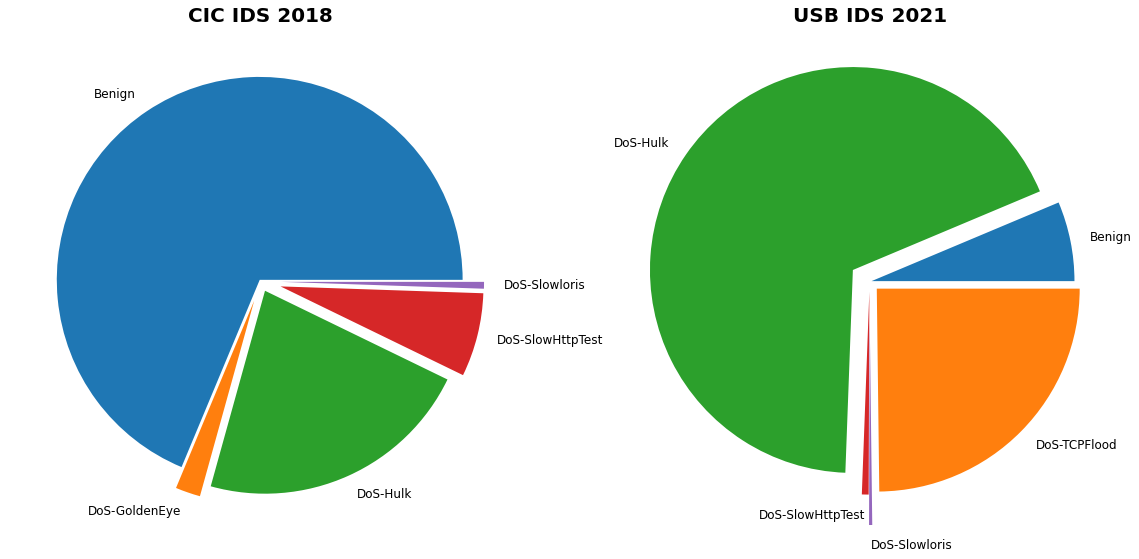

In [15]:
plt.rc('font', size=12)
fig, (ax1, ax2)= plt.subplots(1, 2, figsize=(20,20))

counts = cic_df.groupby('Label')['Label'].value_counts()
labels = cic_df.groupby('Label')['Label'].unique().tolist()
ax1.pie(counts,labels=[i for i in labels for i in i], explode=(0.01,0.1,0.05,0.1,0.1))
ax1.set_title('CIC IDS 2018', fontdict={'fontsize':'20', 'fontweight':'bold'})

counts = usb_df.groupby('Label')['Label'].value_counts()
labels = usb_df.groupby('Label')['Label'].unique().tolist()
ax2.pie(counts, labels=[i for i in labels for i in i], colors=['tab:blue', 'tab:green', 'tab:red', 'tab:purple', 'tab:orange'], explode=(0.01,0.1,0.05,0.1,0.1))
ax2.set_title('USB IDS 2021', fontdict={'fontsize':'20', 'fontweight':'bold'})

# fig.suptitle('Class Labels')

## Numerical Feature Analysis

In [9]:
# Get numerical features and corresponding labels
cic_numerical = cic_df.iloc[:,2:-1].astype(dtype=float)
cic_labels = cic_df.iloc[:,-1]

usb_numerical = usb_df.iloc[:,2:-1].astype(dtype=float)
usb_labels = usb_df.iloc[:,-1]

In [58]:
# Get CIC 2018 descriptive statistics
cic_numerical.describe()

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Fwd Byts/b Avg,Fwd Pkts/b Avg,Fwd Blk Rate Avg,Bwd Byts/b Avg,Bwd Pkts/b Avg,Bwd Blk Rate Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,2.089230e+05,208923.000000,208923.000000,208923.000000,2.089230e+05,208923.000000,208923.000000,208923.000000,208923.000000,208923.000000,208923.000000,208923.000000,208923.000000,2.089230e+05,2.089230e+05,2.089230e+05,2.089230e+05,2.089230e+05,2.089230e+05,2.089230e+05,2.089230e+05,2.089230e+05,2.089230e+05,2.089230e+05,2.089230e+05,2.089230e+05,2.089230e+05,2.089230e+05,2.089230e+05,208923.000000,208923.0,208923.0,208923.0,208923.000000,208923.000000,2.089230e+05,2.089230e+05,208923.000000,208923.000000,208923.000000,208923.000000,2.089230e+05,208923.000000,208923.000000,208923.000000,208923.000000,208923.000000,208923.000000,208923.0,208923.000000,208923.000000,208923.000000,208923.000000,208923.000000,208923.0,208923.0,208923.0,208923.0,208923.0,208923.0,208923.000000,208923.000000,208923.000000,2.089230e+05,208923.000000,208923.000000,208923.000000,208923.000000,2.089230e+05,2.089230e+05,2.089230e+05,2.089230e+05,2.089230e+05,2.089230e+05,2.089230e+05,2.089230e+05
mean,8.365811e+06,4.166865,3.993146,371.486744,2.506670e+03,278.160858,7.065751,63.731299,116.784105,250.144623,16.994251,88.054874,107.037738,2.203857e+05,6.991293e+04,1.666430e+06,1.161024e+06,4.537239e+06,1.158517e+06,8.117555e+06,2.098608e+06,1.270260e+06,4.379399e+06,1.380497e+06,5.367044e+06,8.158830e+05,7.622910e+05,2.156220e+06,3.309952e+05,0.024229,0.0,0.0,0.0,106.330083,93.958578,4.341044e+04,2.650249e+04,6.987876,379.596464,72.225143,125.532692,4.152418e+04,0.003279,0.024229,0.030332,0.256927,0.565845,0.035750,0.0,0.030332,0.387526,82.791239,63.731299,88.054874,0.0,0.0,0.0,0.0,0.0,0.0,4.166865,371.486744,3.993146,2.506670e+03,4710.452387,2838.904884,1.162433,24.831330,5.705617e+04,2.482675e+04,9.279086e+04,4.221885e+04,2.550879e+06,1.410805e+05,2.691477e+06,2.425546e+06
std,2.471143e+07,25.655770,68.891478,862.056268,9.876091e+04,386.599508,17.987940,77.328070,171.103213,387.483367,43.086639,143.196313,166.643290,4.522576e+06,2.695052e+05,8.024556e+06,4.112582e+06,1.307446e+07,7.781325e+06,2.460150e+07,9.069565e+06,3.877453e+06,1.295548e+07,8.931119e+06,2.174917e+07,5.363959e+06,3.661067e+06,9.995921e+06,4.580255e+06,0.153760,0.0,0.0,0.0,582.754903,1379.466510,2.028826e+05,1.050443e+05,17.547170,480.738717,98.775004,160.517447,7.034176e+04,0.057166,0.153760,0.171499,0.436940,0.495647,0.185667,0.0,0.171499,0.662632,104.485068,77.328070,143.196313,0.0,0.0,0.0,0.0,0.0,0.0,25.655770,862.056268,68.891478,9.876091e+04,10049.468538,12385.233038,2.876006,9.999074,6.822290e+05,2.718426e+05,8.690240e+05,6.195891e+05,1.096716e+07,1.738084e+06,1.142940e+07,1.078088e+07
min,1.000000e+00,1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.666784e-02,3.333333e-01,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0,0.0,0.0,0.00

In [59]:
# Get USB 2021 descriptive statistics
usb_numerical.describe()

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Fwd Byts/b Avg,Fwd Pkts/b Avg,Fwd Blk Rate Avg,Bwd Byts/b Avg,Bwd Pkts/b Avg,Bwd Blk Rate Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,4.813430e+05,481343.000000,481343.000000,481343.000000,4.813430e+05,481343.000000,481343.000000,481343.000000,481343.000000,481343.000000,481343.000000,481343.000000,481343.000000,4.813430e+05,481343.000000,4.813430e+05,4.813430e+05,4.813430e+05,4.813430e+05,4.813430e+05,4.813430e+05,4.813430e+05,4.813430e+05,4.813430e+05,4.813430e+05,4.813430e+05,4.813430e+05,4.813430e+05,4.813430e+05,481343.000000,481343.000000,481343.0,481343.0,481343.000000,481343.000000,481343.000000,481343.000000,481343.000000,481343.000000,481343.000000,481343.000000,4.813430e+05,481343.000000,481343.000000,481343.000000,481343.000000,481343.000000,481343.0,481343.0,481343.0,481343.000000,481343.000000,481343.000000,481343.000000,481343.000000,481343.000000,481343.000000,4.813430e+05,481343.000000,4.813430e+05,481343.000000,481343.000000,481343.0,481343.000000,481343.000000,481343.000000,481343.000000,481343.000000,4.813430e+05,4.813430e+05,4.813430e+05,4.813430e+05,4.813430e+05,4.813430e+05,4.813430e+05,4.813430e+05
mean,1.817987e+06,15.584918,16.118500,358.798815,2.687571e+04,260.574021,0.217456,39.511132,96.302413,3798.232637,0.005030,1294.968443,1612.562953,6.070221e+04,596.202641,1.171629e+05,2.455082e+05,1.020251e+06,9.575652e+03,1.606889e+06,1.732147e+05,2.675967e+05,8.559855e+05,2.787107e+04,1.140184e+06,1.238062e+05,2.047656e+05,7.147908e+05,2.386059e+04,5.425831,2.382891,0.0,0.0,505.130404,523.762639,313.905563,282.297079,0.171443,3807.976372,578.767523,1195.877214,2.497875e+06,1.438641,2.036431,0.555471,7.808723,30.474780,0.0,0.0,0.0,0.804234,578.767523,39.511132,1294.968443,79.960922,4.413695,4944.776843,9.814657e+03,3.392246,7.073870e+06,0.005279,21.990053,0.0,555.950555,28288.867577,255.311884,5.450477,31.915129,1.636817e+05,9.013128e+03,1.747761e+05,1.566501e+05,6.134283e+05,6.210196e+04,6.776963e+05,5.592249e+05
std,8.831231e+06,37.388954,64.818229,394.536269,1.732604e+05,149.142861,7.552512,20.818658,59.087051,3287.053893,0.760358,1147.826784,1476.933884,4.990589e+05,1162.648923,8.368679e+05,9.698578e+05,3.898338e+06,4.419698e+05,8.323503e+06,1.014394e+06,9.452021e+05,3.123599e+06,6.966675e+05,6.656131e+06,1.047286e+06,8.762002e+05,3.429262e+06,8.804445e+05,7.553998,13.149024,0.0,0.0,1213.159522,2074.194247,614.133946,549.311464,7.022011,3275.847801,504.112927,1033.322352,2.917534e+06,0.522850,0.379144,0.517681,15.107582,101.393925,0.0,0.0,0.0,0.155602,504.112927,20.818658,1147.826784,159.420834,8.018557,9834.263119,7.198021e+04,27.299708,1.764012e+07,0.072465,13.346211,0.0,501.278447,3573.158764,822.817682,7.631206,1.583603,1.090172e+06,3.779129e+05,1.312756e+06,1.023372e+06,3.511503e+06,8.665165e+05,3.929222e+06,3.317262e+06
min,5.100000e+01,1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.017780,4.566667e+01,0.000000e+00,5.100000e+01,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.00000

In [10]:
def outlier_percentages(numerical_features):
    q1 = numerical_features.quantile(0.25)
    q3 = numerical_features.quantile(0.75)
    iqr = q3 - q1
    return ((numerical_features < (q1 - 1.5 * iqr)) | (numerical_features > (q3 + 1.5 * iqr))).sum() / numerical_features.shape[0]

In [11]:
# View percentages of CIC outliers
pd.DataFrame(outlier_percentages(cic_numerical)).transpose()

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Fwd Byts/b Avg,Fwd Pkts/b Avg,Fwd Blk Rate Avg,Bwd Byts/b Avg,Bwd Pkts/b Avg,Bwd Blk Rate Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,0.088856,0.056624,0.066221,0.009544,0.116052,0.0,0.169306,0.001125,0.000392,0.106881,0.164238,0.044366,0.051737,0.212188,0.175653,0.089071,0.05582,0.054159,0.208685,0.082571,0.081695,0.03687,0.05369,0.21158,0.185738,0.178583,0.178061,0.183316,0.213337,0.024229,0.0,0.0,0.0,0.022018,0.04271,0.167468,0.223867,0.166851,0.00001,0.015321,0.00001,0.023162,0.003279,0.024229,0.030332,0.0,0.0,0.03575,0.0,0.030332,0.002408,0.013823,0.001125,0.044366,0.0,0.0,0.0,0.0,0.0,0.0,0.056624,0.009544,0.066221,0.116052,0.103866,0.07352,0.115497,0.008707,0.071519,0.045601,0.071519,0.071519,0.105225,0.052163,0.105225,0.105225


In [12]:
# View percentages of USB outliers
pd.DataFrame(outlier_percentages(usb_numerical)).transpose()

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Fwd Byts/b Avg,Fwd Pkts/b Avg,Fwd Blk Rate Avg,Bwd Byts/b Avg,Bwd Pkts/b Avg,Bwd Blk Rate Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,0.069306,0.020927,0.022901,0.077546,0.05532,0.000008,0.002169,0.001396,0.000004,0.0,0.000046,0.000002,0.010741,0.12011,0.223356,0.058763,0.064187,0.069796,0.008019,0.069306,0.054626,0.062745,0.069796,0.177848,0.09959,0.101078,0.095751,0.096563,0.064075,0.236669,0.308832,0.0,0.0,0.020619,0.022901,0.223265,0.222673,0.000798,0.0,0.000002,0.000002,0.036244,0.000023,0.025952,0.000706,0.01253,0.021228,0.0,0.0,0.0,0.022765,0.000002,0.001396,0.000002,0.235128,0.235128,0.235128,0.202099,0.202099,0.202099,0.005279,0.001795,0.0,0.000008,0.065089,0.006336,0.237089,0.010381,0.038442,0.005287,0.038442,0.038442,0.038889,0.009056,0.038889,0.038889


## Categorical Feature Analysis

In [10]:
# Get categorical features from CIC 2018 and USB 2021 and convert to string
cic_categorical = cic_df.iloc[:,:2].astype(dtype=int)
usb_categorical = usb_df.iloc[:,:2].astype(dtype=int)

[17  6  0]


<AxesSubplot:>

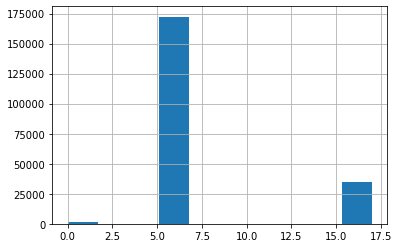

In [14]:
# View distribution of CIC protocols
print(cic_categorical['Protocol'].unique())
cic_categorical['Protocol'].hist()

[ 6  0 17]


<AxesSubplot:>

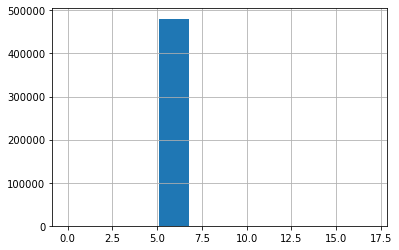

In [15]:
# View distribution of USB protocols
print(usb_categorical['Protocol'].unique())
usb_categorical['Protocol'].hist()

Text(0.5, 1.0, 'Destination Ports')

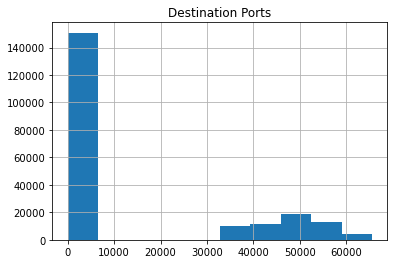

In [16]:
# View distribution of CIC destination ports
cic_categorical['Dst Port'].hist()
plt.title('Destination Ports')

Text(0.5, 1.0, 'Destination Ports')

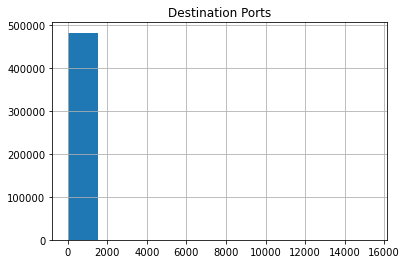

In [17]:
# View distribution of USB destination ports
usb_categorical['Dst Port'].hist()
plt.title('Destination Ports')

Text(0.5, 1.0, 'Top 10 Destination Ports')

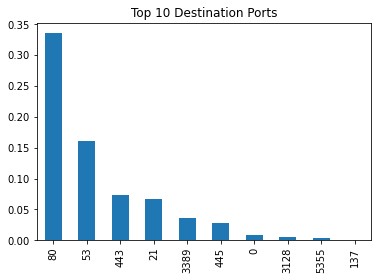

In [18]:
# View percentage distribution of top 10 CIC destination ports
top_10_cic_ports = cic_categorical['Dst Port'].astype(dtype=str).value_counts()[:10] / cic_categorical['Dst Port'].shape[0]
top_10_cic_ports.plot(kind='bar')
plt.title('Top 10 Destination Ports')

Text(0.5, 1.0, 'Top 10 Destination Ports')

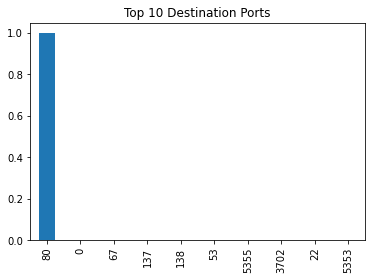

In [19]:
# View percentage distribution of top 10 USB destination ports
top_10_usb_ports = usb_categorical['Dst Port'].astype(dtype=str).value_counts()[:10] / usb_categorical['Dst Port'].shape[0]
top_10_usb_ports.plot(kind='bar')
plt.title('Top 10 Destination Ports')

## Combining the Analysis

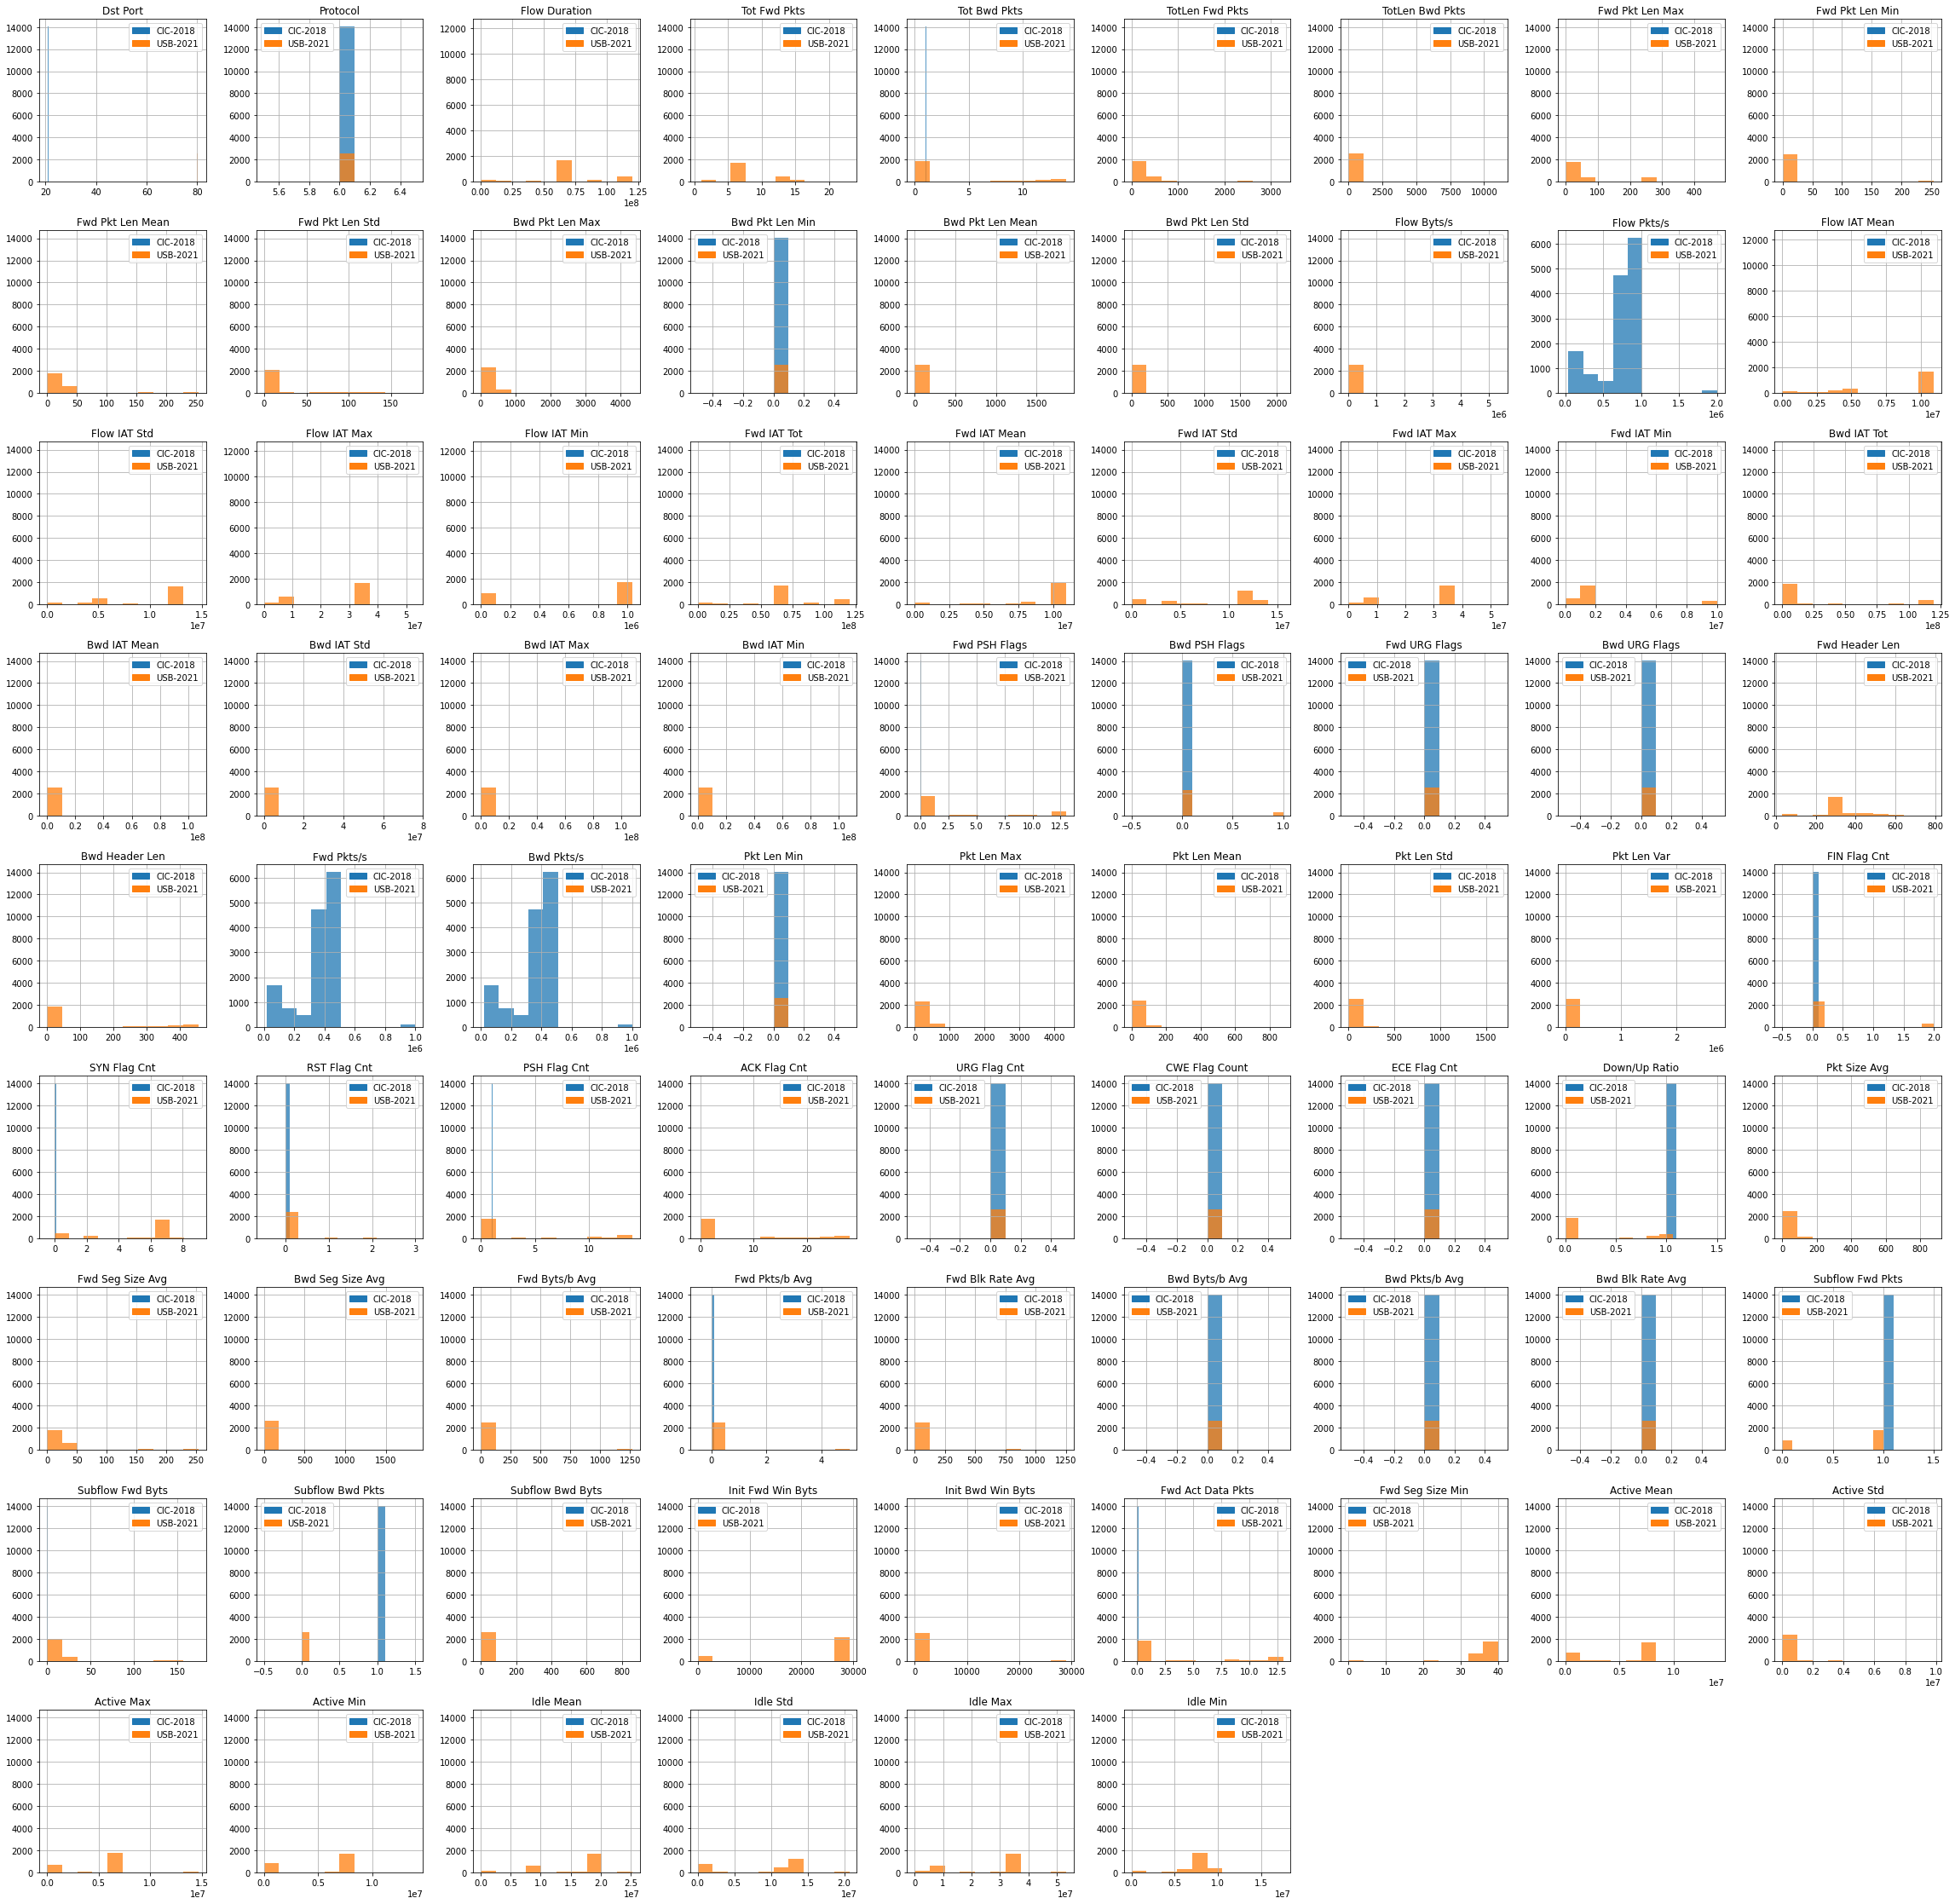

In [13]:
import matplotlib.patches as mpatches

mask_cic_df = cic_df.loc[cic_df['Label'].str.contains('slowhttptest', case=False)].copy()  # Change string to get desired class from CIC
mask_usb_df = usb_df.loc[usb_df['Label'].str.contains('slowhttptest', case=False)].copy()  # Change string to get desired class from USB

mask_cic_ft = mask_cic_df.iloc[:,:-1].astype(dtype=float)
mask_usb_ft = mask_usb_df.iloc[:,:-1].astype(dtype=float)

plt.rc('figure', figsize=(40, 40))

axs = mask_cic_ft.hist(alpha=0.75)

for ax, (colname, values) in zip(axs.flat, mask_usb_ft.iteritems()):
    values.hist(ax=ax, alpha=0.75)
    blue_patch = mpatches.Patch(color='tab:blue', label='CIC-2018')
    orange_patch = mpatches.Patch(color='tab:orange', label='USB-2021')
    ax.legend(handles=[blue_patch,orange_patch])

plt.show()

<AxesSubplot:>

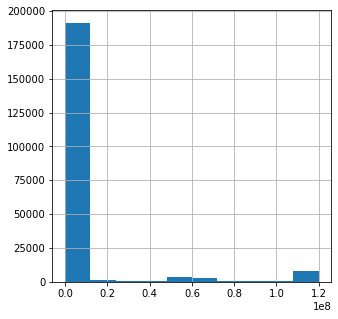

In [38]:
# Robust scaler does not make much difference in how the feature is distributed and results would be be very similar
plt.rc('figure', figsize=(5, 5))
scaler = RobustScaler()
x_np = scaler.fit_transform(cic_df)
x = pd.DataFrame(x_np, columns=cic_df.columns)

cic_df['Flow Duration'].hist()

<AxesSubplot:>

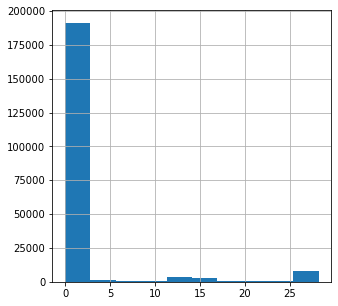

In [36]:
x['Flow Duration'].hist()